# Building a classifier with squeezed states

In [2]:
import qutip as qt
from sklearn import svm, datasets
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import time

The goal of this code is to build a classifier based on the kernel methods. The particularity is that we introduce a *squeezing feature map*, as introduce in this [paper](https://arxiv.org/pdf/1803.07128.pdf). We will consider an inital state (Fock?Coherent?) and squeeze it according to the classical point we are given.     

In [84]:
def encode_squeeze(x, N = 20):   
    # This functions encodes the number x into a squeezed vacuum state
    
    psi = qt.squeeze(N, x) * qt.basis(N, 0)
    
    return psi  

def scalar_of_squeezed(x, y):
    # This function calculates the element of the Kernel matrix K_xy, only for trials.  
        
    k = 1    
        
    for ii in range(len(x)):
        x_sq = encode_squeeze(x[ii])
        y_sq = encode_squeeze(y[ii])

        scalar_prod = x_sq.dag()*y_sq
        scalar_prod = scalar_prod.full()[0][0]

        k = k*(scalar_prod)
        
    return np.asscalar(np.real(k))

    
def squeeze_kernel(X, Y):
    # This function calculates the kernel as Eq. (7) of M. Schuld paper. We define the distance of this kernel 
    # as the productory of the scalar product of the squeezed representation of each dimension of the vectors
    # x and y.
    
    l_X = len(X)
    l_Y = len(Y)
    
    K = np.zeros((l_X, l_Y))

    for n_x in tqdm(range(l_X)):

        for n_y in range(l_Y):

            x = X[n_x]
            y = Y[n_y]

            k = 1

            for ii in range(np.shape(x)[0]):        

                x_sq = encode_squeeze(x[ii])
                y_sq = encode_squeeze(y[ii])

                scalar_prod = x_sq.dag()*y_sq
                scalar_prod = scalar_prod.full()[0][0]

                k = k*(scalar_prod)

            K[n_x, n_y] = np.asscalar(np.real(k))

    return K     

We will the iris dataset:

In [85]:
iris = datasets.load_iris()
X = iris.data[:, :2] 
Y = iris.target

We use as classifier the SVM

In [86]:
clf = svm.SVC(kernel=squeeze_kernel)
clf.fit(X, Y)

100%|██████████| 150/150 [03:30<00:00,  1.39s/it]


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel=<function squeeze_kernel at 0x7f9bf25c1c80>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

100%|██████████| 616/616 [12:40<00:00,  1.26s/it]

616
150
(616, 150)


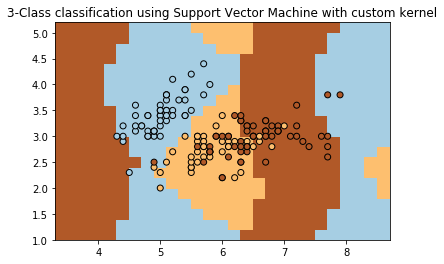

In [82]:
h = .2  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('3-Class classification using Support Vector Machine with custom'
          ' kernel')
plt.axis('tight')
plt.show()

### Classical custom kernel

In [78]:
def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])    
    
    return np.dot(np.dot(X, M), Y.T)

In [79]:
clf_class = svm.SVC(kernel=my_kernel)
clf_class.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel=<function my_kernel at 0x7f9bf2851e18>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

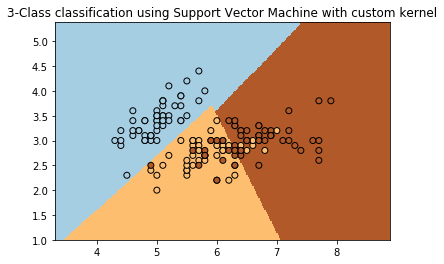

In [81]:
h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_class.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('3-Class classification using Support Vector Machine with custom'
          ' kernel')
plt.axis('tight')
plt.show()